# Tópicos de Minería de datos - TP 3
## Autora: Aldana Zarate

# Imports

In [ ]:
# imports
library(MASS)
install.packages("e1071")
library(e1071)

# Ejercicio 1

## a)


In [10]:
data(crabs)
summary(crabs)

 sp      sex         index            FL              RW              CL       
 B:100   F:100   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:100   M:100   1st Qu.:13.0   1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27  
                 Median :25.5   Median :15.55   Median :12.80   Median :32.10  
                 Mean   :25.5   Mean   :15.58   Mean   :12.74   Mean   :32.11  
                 3rd Qu.:38.0   3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23  
                 Max.   :50.0   Max.   :23.10   Max.   :20.20   Max.   :47.60  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:31.50   1st Qu.:11.40  
 Median :36.80   Median :13.90  
 Mean   :36.41   Mean   :14.03  
 3rd Qu.:42.00   3rd Qu.:16.60  
 Max.   :54.60   Max.   :21.60  


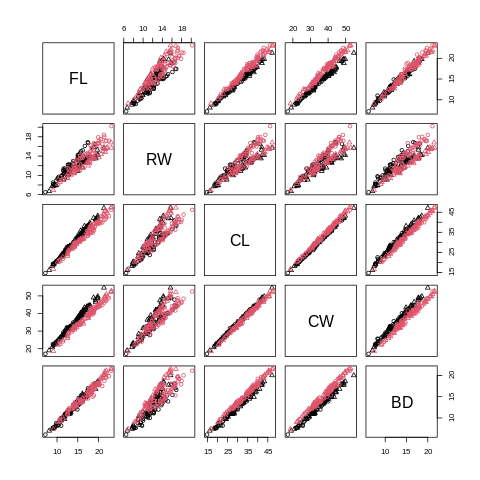

In [11]:
plot(crabs[,4:8],col=as.numeric(crabs[,1]),pch=as.numeric(crabs[,2]))

Podemos observar una superposición importante entre los datos en la mayoría de las variables.

### K-means

In [12]:
# Usamos transformación logarítmica primero y luego escalas + PCA como fue sugerido obteniendo: crabs.log, crabs.log.scaled, crabs.log.scaled.pca
crabs.log <- crabs
crabs.log[,4:8] <- log(crabs[,4:8])

crabs.log.scaled <- crabs.log
crabs.log.scaled[,4:8] <- scale(crabs.log[,4:8])
crabs.log.scaled.pca <- prcomp(crabs.log.scaled[,4:8], retx=TRUE)$x
# Al ejecutar dio exactamente igual con la PCA así que probamos de volver a escalar los datos
crabs.log.scaled.pcascaled <- scale(crabs.log.scaled.pca)

In [13]:
# Función para comparar los clusters contra las clases originales
compare.clusters <- function(cluster, original){
  tab <- table(original, cluster)
  class.match <- matchClasses(as.matrix(tab), method="exact")
  print(tab[, class.match])
}

In [14]:
# Ejecución
cat("----------------Trans. logarítmica----------------- \n")
crab.log.km <- kmeans(crabs.log[,4:8], cent=2)
cat("------------Especie------------ \n")
compare.clusters(crab.log.km$cluster, crabs$sp)
cat("------------Sexo------------ \n")
compare.clusters(crab.log.km$cluster, crabs$sex)

cat("----------------Escala----------------- \n")
crab.log.scaled.km <- kmeans(crabs.log.scaled[,4:8], cent=2)
cat("-------Especie------- \n")
compare.clusters(crab.log.scaled.km$cluster, crabs$sp)
cat("-------Sexo------- \n")
compare.clusters(crab.log.scaled.km$cluster, crabs$sex)

cat("----------------PCA----------------- \n")
crab.log.scaled.pca.km <- kmeans(crabs.log.scaled.pca, cent=2)
cat("-------Especie------- \n")
compare.clusters(crab.log.scaled.pca.km$cluster, crabs$sp)
cat("-------Sexo------- \n")
compare.clusters(crab.log.scaled.pca.km$cluster, crabs$sex)

cat("----------------PCA + escala----------------- \n")
crab.log.scaled.pcascaled.km <- kmeans(crabs.log.scaled.pcascaled, cent=2)
cat("-------Especie------- \n")
compare.clusters(crab.log.scaled.pcascaled.km$cluster, crabs$sp)
cat("-------Sexo------- \n")
compare.clusters(crab.log.scaled.pcascaled.km$cluster, crabs$sex)

----------------Trans. logarítmica----------------- 
------------Especie------------ 
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
        cluster
original  2  1
       B 48 52
       O 27 73
------------Sexo------------ 
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        cluster
original  1  2
       F 64 36
       M 61 39
----------------Escala----------------- 
-------Especie------- 
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
        cluster
original  2  1
       B 48 52
       O 27 73
-------Sexo------- 
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        cluster
original  1  2
       F 64 36
       M 61 39
----------------PCA----------------- 
-------Especie------- 
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched

Podemos observar que recién en la última prueba que hicimos se puede observar una mejora notable, ya que los 3 primeros intentos dieron resultados iguales y no demasiado buenos. Para este último caso de PCA + scale, obtenemos un muy buen resultado del 95% pero solo para el sexo, con lo cual esta variable separa mejor los datos.

### Hclust - jerárquico

Probamos primero con los datos usando una transformación logarítmica y luego con la que obtuvimos los mejores resultados para kmeans.
Por el lado del método a usar, por como parecen ser hasta ahora los datos usaría el criterio average o complete para imponer más ese tipo de estructuras (que estén cerca los datos como conjunto y no tanto por vecindades particulares).

----------------Trans. logarítmica - Average----------------- 
------------Especie------------ 
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 57 %
        cluster
original  1  2
       B 20 80
       O  6 94
------------Sexo------------ 
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51 %
        cluster
original  1  2
       F 14 86
       M 12 88
----------------Trans. logarítmica - Complete----------------- 
------------Especie------------ 
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
        cluster
original  1  2
       B 48 52
       O 27 73
------------Sexo------------ 
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        cluster
original  2  1
       F 64 36
       M 61 39
----------------PCA + scale - Average----------------- 
------------Especie------------ 
Direct agr

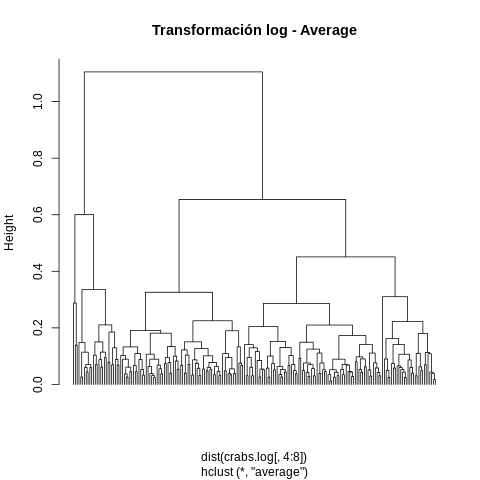

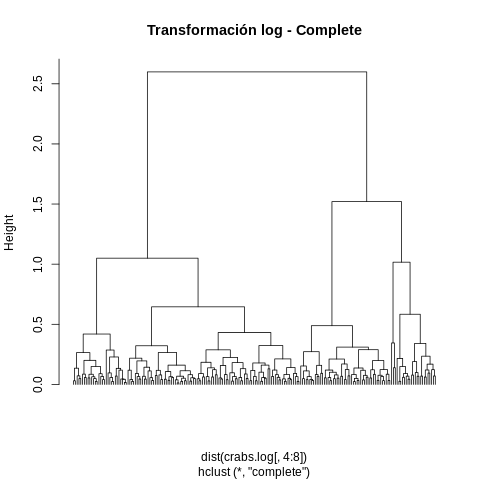

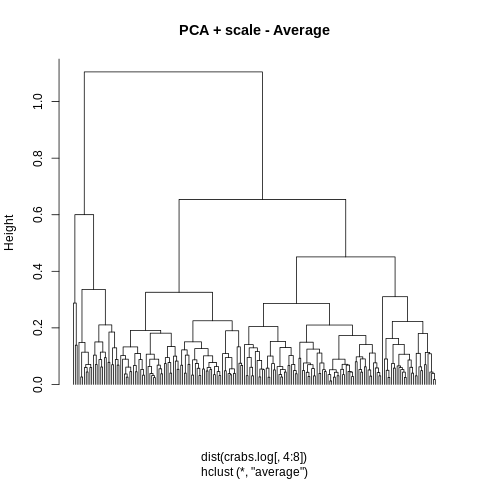

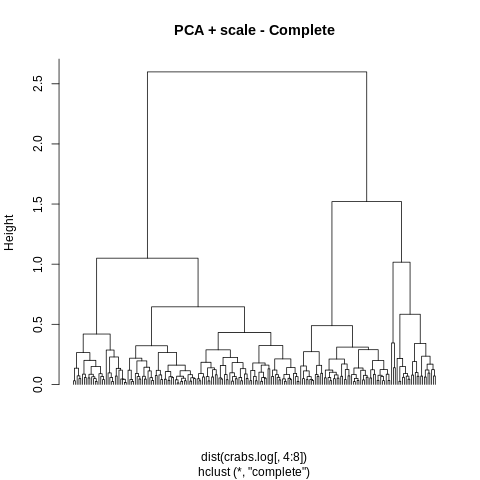

In [15]:
cat("----------------Trans. logarítmica - Average----------------- \n")
crab.log.hc.avg <- hclust(dist(crabs.log[,4:8]), method="average")
crab.log.hc.avg.cut <- cutree(crab.log.hc.avg, k=2)
cat("------------Especie------------ \n")
compare.clusters(crab.log.hc.avg.cut, crabs$sp)
cat("------------Sexo------------ \n")
compare.clusters(crab.log.hc.avg.cut, crabs$sex)
plot(crab.log.hc.avg, labels=FALSE, hang=-1, main="Transformación log - Average")

cat("----------------Trans. logarítmica - Complete----------------- \n")
crab.log.hc.cmt <- hclust(dist(crabs.log[,4:8]), method="complete")
crab.log.hc.cmt.cut <- cutree(crab.log.hc.cmt, k=2)
cat("------------Especie------------ \n")
compare.clusters(crab.log.hc.cmt.cut, crabs$sp)
cat("------------Sexo------------ \n")
compare.clusters(crab.log.hc.cmt.cut, crabs$sex)
plot(crab.log.hc.cmt, labels=FALSE, hang=-1, main="Transformación log - Complete")

cat("----------------PCA + scale - Average----------------- \n")
crab.log.scaled.pcascaled.hc.avg <- hclust(dist(crabs.log.scaled.pcascaled), method="average")
crab.log.scaled.pcascaled.hc.avg.cut <- cutree(crab.log.scaled.pcascaled.hc.avg, k=2)
cat("------------Especie------------ \n")
compare.clusters(crab.log.scaled.pcascaled.hc.avg.cut, crabs$sp)
cat("------------Sexo------------ \n")
compare.clusters(crab.log.scaled.pcascaled.hc.avg.cut, crabs$sex)
plot(crab.log.hc.avg, labels=FALSE, hang=-1, main="PCA + scale - Average")

cat("----------------PCA + scale - Complete----------------- \n")
crab.log.scaled.pcascaled.hc.cmt <- hclust(dist(crabs.log.scaled.pcascaled), method="complete")
crab.log.scaled.pcascaled.hc.cmt.cut <- cutree(crab.log.scaled.pcascaled.hc.cmt, k=2)
cat("------------Especie------------ \n")
compare.clusters(crab.log.scaled.pcascaled.hc.cmt.cut, crabs$sp)
cat("------------Sexo------------ \n")
compare.clusters(crab.log.scaled.pcascaled.hc.cmt.cut, crabs$sex)
plot(crab.log.hc.cmt, labels=FALSE, hang=-1, main="PCA + scale - Complete")



Podemos observar que usando average linkage, se obtienen árboles con ramas muy desbalanceadas (usando single linkage sería aún peor). Usando complete linkage, esta situación mejora levemente. En ninguno de los 4 casos se obtuvieron buenos resultados.

## b)

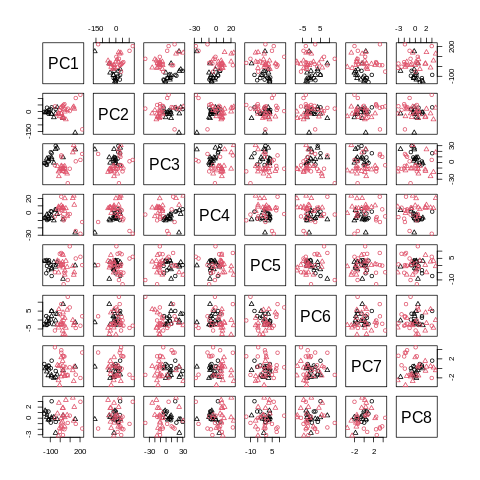

In [16]:
load("lampone.Rdata")
lampone.x <- lampone[, -c(1,143,144)] # saco las clases y la 144 porque me da error de que no es numerico sino

lampone.x.pca <- as.data.frame(prcomp(lampone.x, retx=TRUE)$x)

plot(lampone.x.pca[,1:8],col=as.numeric(lampone[,1]),pch=as.numeric(lampone[,143]))

Se puede observar como en varias variables ubicadas en el superior de la gráfica permiten separar mejor los datos, mientras que en el inferior los mismos se encuentran más superpuestos.


### K-means

Procedemos a buscar los clusters sin hacer ninguna transformación antes como hicimos en el apartado anterior:

In [17]:
lampone.x.km <- kmeans(lampone.x, cent=2)
compare.clusters(lampone.x.km$cluster, lampone[,1])
compare.clusters(lampone.x.km$cluster, lampone[,143])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 91.84 %
        cluster
original  2  1
    2006 17  2
    2007  2 28
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
        cluster
original  2  1
      2  10 12
      10  9 18


Se puede ver que para el año de medición el método funciona muy bien, y no tan así para la especie. Procedemos a probar con la PCA para ver si mejoramos esta situación (no se puede hacer log ni scale (valores NA/NaN/Inf))

In [18]:
lampone.x.pca.km <- kmeans(lampone.x.pca, cent=2)
compare.clusters(lampone.x.pca.km$cluster, lampone[,1])
compare.clusters(lampone.x.pca.km$cluster, lampone[,143])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 91.84 %
        cluster
original  2  1
    2006 17  2
    2007  2 28
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
        cluster
original  2  1
      2  10 12
      10  9 18


No hay diferencias con el resultado anterior. Procedemos ahora sí a probar una escala a partir de la pca:

In [19]:
lampone.x.pca.scaled.km <- kmeans(scale(lampone.x.pca), cent=2)
compare.clusters(lampone.x.pca.scaled.km$cluster, lampone[,1])
compare.clusters(lampone.x.pca.scaled.km$cluster, lampone[,143])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.02 %
        cluster
original  1  2
    2006 12  7
    2007 17 13
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 53.06 %
        cluster
original  1  2
      2  14  8
      10 15 12


Vemos que los resultados empeoraron notablemente, quizás debido a que escalando los datos, las variables importantes pierden peso.


### Clustering jerárquico

Procedemos a probar con clustering jerárquico, acá voy a probar con los 3 criterios porque la situación es similar a la de los datos de crabs pero menos acentuada.

----------------Sin transformaciones - Single----------------- 
------------Año------------ 
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 61.22 %
        cluster
original  2  1
    2006  1 18
    2007  1 29
------------Especie------------ 
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 55.1 %
        cluster
original  2  1
      2   1 21
      10  1 26
----------------Sin transformaciones - Average----------------- 
------------Año------------ 
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 61.22 %
        cluster
original  2  1
    2006  1 18
    2007  1 29
------------Especie------------ 
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 55.1 %
        cluster
original  2  1
      2   1 21
      10  1 26
----------------Sin transformaciones - Complete----------------- 
------------Año------------

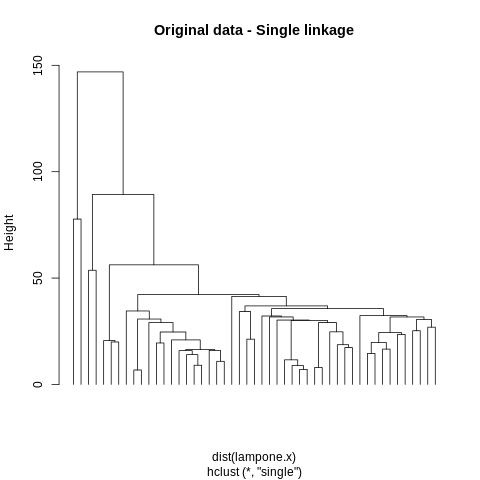

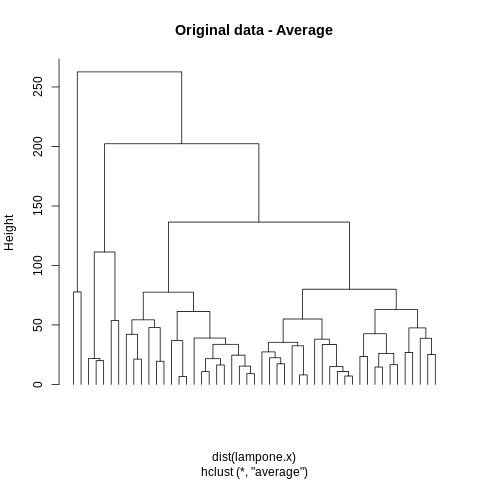

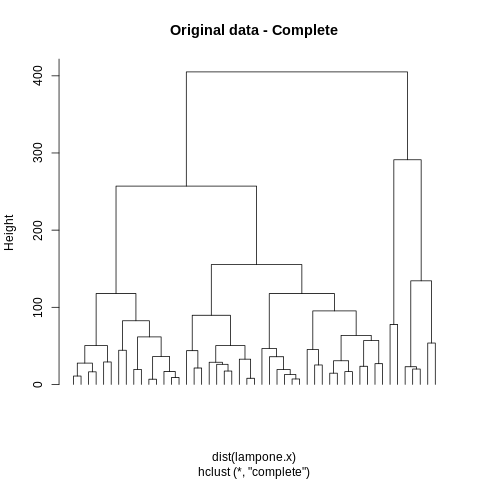

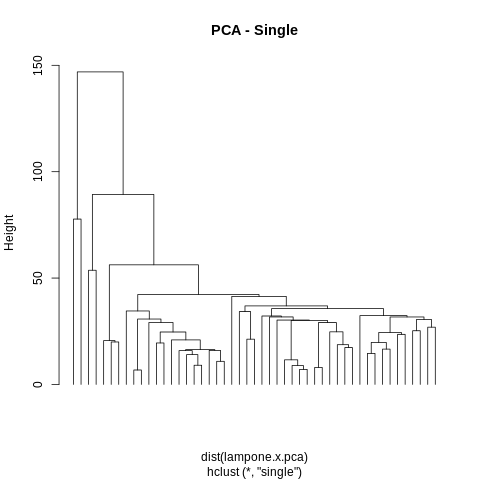

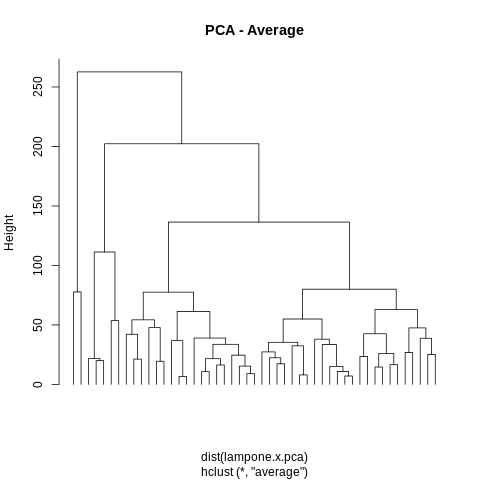

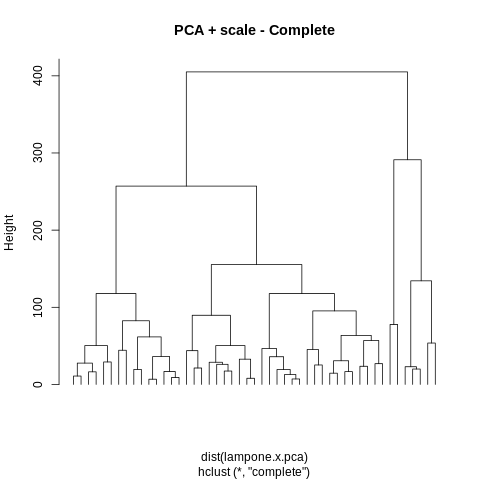

In [21]:
cat("----------------Sin transformaciones - Single----------------- \n")
lampone.x.hc.sing <- hclust(dist(lampone.x), method="single")
lampone.x.hc.sing.cut <- cutree(lampone.x.hc.sing, k=2)
cat("------------Año------------ \n")
compare.clusters(lampone.x.hc.sing.cut, lampone[,1])
cat("------------Especie------------ \n")
compare.clusters(lampone.x.hc.sing.cut, lampone[,143])
plot(lampone.x.hc.sing, labels=FALSE, hang=-1, main="Original data - Single linkage")

cat("----------------Sin transformaciones - Average----------------- \n")
lampone.x.hc.avg <- hclust(dist(lampone.x), method="average")
lampone.x.hc.avg.cut <- cutree(lampone.x.hc.avg, k=2)
cat("------------Año------------ \n")
compare.clusters(lampone.x.hc.avg.cut, lampone[,1])
cat("------------Especie------------ \n")
compare.clusters(lampone.x.hc.avg.cut, lampone[,143])
plot(lampone.x.hc.avg, labels=FALSE, hang=-1, main="Original data - Average")

cat("----------------Sin transformaciones - Complete----------------- \n")
lampone.x.hc.cmt <- hclust(dist(lampone.x), method="complete")
lampone.x.hc.cmt.cut <- cutree(lampone.x.hc.cmt, k=2)
cat("------------Año------------ \n")
compare.clusters(lampone.x.hc.cmt.cut, lampone[,1])
cat("------------Especie------------ \n")
compare.clusters(lampone.x.hc.cmt.cut, lampone[,143])
plot(lampone.x.hc.cmt, labels=FALSE, hang=-1, main="Original data - Complete")


cat("----------------PCA - Single----------------- \n")
lampone.x.pca.hc.sing <- hclust(dist(lampone.x.pca), method="single")
lampone.x.pca.hc.sing.cut <- cutree(lampone.x.pca.hc.sing, k=2)
cat("------------Año------------ \n")
compare.clusters(lampone.x.pca.hc.sing.cut, lampone[,1])
cat("------------Especie------------ \n")
compare.clusters(lampone.x.pca.hc.sing.cut, lampone[,143])
plot(lampone.x.pca.hc.sing, labels=FALSE, hang=-1, main="PCA - Single")

cat("----------------PCA - Average----------------- \n")
lampone.x.pca.hc.avg <- hclust(dist(lampone.x.pca), method="average")
lampone.x.pca.hc.avg.cut <- cutree(lampone.x.pca.hc.avg, k=2)
cat("------------Año------------ \n")
compare.clusters(lampone.x.pca.hc.avg.cut, lampone[,1])
cat("------------Especie------------ \n")
compare.clusters(lampone.x.pca.hc.avg.cut, lampone[,143])
plot(lampone.x.pca.hc.avg, labels=FALSE, hang=-1, main="PCA - Average")

cat("----------------PCA + scale - Complete----------------- \n")
lampone.x.pca.hc.cmt <- hclust(dist(lampone.x.pca), method="complete")
lampone.x.pca.hc.cmt.cut <- cutree(lampone.x.pca.hc.cmt, k=2)
cat("------------Año------------ \n")
compare.clusters(lampone.x.pca.hc.cmt.cut, lampone[,1])
cat("------------Especie------------ \n")
compare.clusters(lampone.x.pca.hc.cmt.cut, lampone[,143])
plot(lampone.x.pca.hc.cmt, labels=FALSE, hang=-1, main="PCA + scale - Complete")

Los resultados son iguales usando los datos originales o la PCA nuevamente, lo que sí se puede ver es que los resultados (que desde el vamos no son buenos) empeoran al usar el criterio complete linkage en ambas clasificaciones (siendo más notorio este declive en la performance en el año).

# Ejercicio 2)

## GAP statistic

Feedback:

la GAP tiene dos errores, uno es que no reiniciaste el vector Wkb en cada iteracion, y el otro es que en gap() está mal la fórmula, la media es solo sobre el primer sumando.

In [4]:
# Implementación del algoritmo de la slide 25
gap <- function(k, B, Wkb, Wk){
    sumatoria <- 0
    for(b in 1:B){
      sumatoria <- sumatoria + (log(Wkb[b]) - log(Wk))
    }

    return(sumatoria/B)
}

std_dev <- function(B, Wkb){
    l <- 0
    for(b in 1:B){
      l <- l + log(Wkb[b])
    }
    l <- l/B

    sdk <- 0
    for(b in 1:B){
      sdk <- sdk + (log(Wkb[b]) - l)^2
    }

    return(sqrt(sdk/B))
}

# Genera una DU que ocupe el mismo hiper-rectangulo que la PCA sobre el original de los datos
gen_du <- function(data){
  nrows <- nrow(data)
  ncols <- ncol(data)

  data.pca <- prcomp(data, retx=TRUE)$x
  du.data <- c()

  for(i in 1:ncols){
    col <- runif(nrows, min(data.pca[,i]), max(data.pca[,i]))
    du.data <- cbind(du.data, col)
  }

  return(du.data)
}

gap.statistic <- function(dataset, max.k, B){
  Wkb <- c()
  gap.k.pred <- NULL
  default.k <- 1
  k <- 1
  found <- 0

  while (k <= (max.k) & !(found==1)) {
    dataset.km <- kmeans(dataset, k)
    Wk <- dataset.km$tot.withinss

    for(b in 1:B){
      dataset.du <- gen_du(dataset)
      dataset.du.km <- kmeans(dataset.du, k)
      wk.b <- dataset.du.km$tot.withinss
      Wkb <- c(Wkb, wk.b)
    }

    gap.k <- gap(k, B, Wkb, Wk)
    sdk <- std_dev(B, Wkb)
    sk <- sqrt(1 + 1/B) * sdk

    if(!is.null(gap.k.pred)){
      if(gap.k.pred >= gap.k - sk){
          found <- 1
      }
    }

    if(found == 0){
      k <- k+1
      gap.k.pred <- gap.k
    }
  }

  if(found == 1){
      return(k-1)
  } else {
      return(default.k)
  }

}

## Estabilidad

In [5]:
# Calcula el score de estabilidad entre dos soluciones de clustering (proveida por el enunciado)
stability.score <- function(n, ind1,  cc1, ind2, cc2){
  #pongo los clusters de nuevo en longitud n - quedan 0 los puntos fuera del sample
  v1 <- v2 <- rep(0,n)
  v1[ind1] <- cc1
  v2[ind2] <- cc2
  #creo una matriz m con 1 donde los dos puntos estan en el mismo cluster, -1 en distinto cluster y 0 si alguno no esta, para cada
  # clustering
  a <- sqrt(v1%*%t(v1))
  m1<- a / -a + 2*(a==round(a))
  m1[is.nan(m1)] <- 0
  a <- sqrt(v2%*%t(v2))
  m2 <- a / -a + 2*(a==round(a))
  m2[is.nan(m2)] <- 0
  #calculo el score, los pares de puntos que estan en la misma situacion en los dos clustering dividido el total de pares validos.
  validos <- sum(v1*v2>0)
  score <- sum((m1*m2)[upper.tri(m1)]>0)/(validos*(validos-1)/2)
  return(score)
}

# Implementación algoritmo

stability <- function(dataset, max.k, nreplics, sampling.percent=0.9){
  nrows <- dim(dataset)[1]

  subsamples <- list()
  for(i in 1:nreplics){
    subsamples[[i]] <- sample(nrows, sampling.percent * nrows)
  }

  k.stabilities.scores <- c()
  for(k in 1:max.k){
    km.replics <- list()
    for(rep in 1:nreplics){
      km.replics[[rep]] <- kmeans(dataset[subsamples[[rep]],], k)$cluster
    }

    # Comparo de a pares las soluciones
    stability.scores <- c()
    for(i in 1:(nreplics -1)){
      for(j in (i+1): nreplics){
          stability.scores <- c(stability.scores,
                                stability.score(nrows, subsamples[[i]], km.replics[[i]], subsamples[[j]], km.replics[[j]]))
      }
    }

    # Sé que no es lo mejor pero por lo pronto voy por la media
    k.stabilities.scores <- c(k.stabilities.scores, mean(stability.scores))
  }

  k.stabilities.scores[1] <- NaN  # para que no se quede siempre con ese k y busque el verdadero

  return(list(scores=k.stabilities.scores, k=which.max(k.stabilities.scores)))

}

# Ejercicio 3

## 4 Gaussianas

In [32]:
cuatro.gaussianas <- function(tot.puntos, gap=2){
  #cuatro clusters de dist. gaussianas
  x<-rnorm(tot.puntos,mean=-gap)
  y<-rnorm(tot.puntos,mean=-gap)
  gausianas<-cbind(x,y,rep(1,length(x)))
  x<-rnorm(tot.puntos,mean=2*gap)
  y<-rnorm(tot.puntos,mean=0)
  gausianas<-rbind(gausianas,cbind(x,y,rep(2,length(x))))
  x<-rnorm(tot.puntos,mean=0.7*gap,sd=0.5)
  y<-rnorm(tot.puntos,mean=2.5*gap,sd=0.5)
  gausianas<-rbind(gausianas,cbind(x,y,rep(3,length(x))))
  x<-rnorm(tot.puntos,mean=-gap,sd=0.5)
  y<-rnorm(tot.puntos,mean=gap,sd=0.5)
  gausianas<-rbind(gausianas,cbind(x,y,rep(4,length(x))))

  return(gausianas)
}

gausianas <- cuatro.gaussianas(100)
gausianas.x <- gausianas[, 1:2]

gausianas.gapstat <- double(10)
# Noté mucha variedad al ejecutar varias veces el algoritmo (debido al azar inicial de kmeans supongo) así que voy a hacer una suerte de máximo recomendado
for(i in 1:10){
  k <- gap.statistic(gausianas.x, 10, 500)
  gausianas.gapstat[k] <- gausianas.gapstat[k] + 1
}

cat("-----------------Gap statistic---------------- \n")
cat("K más elegido: ", which.max(gausianas.gapstat), "\n")
cat("-----------------Estabilidad---------------- \n")
results <- stability(gausianas.x, 10, 10)
cat("K más elegido: ", results$k)

-----------------Gap statistic---------------- 
K más elegido:  5 
-----------------Estabilidad---------------- 
K más elegido:  3

## Iris


In [34]:
iris.x <- scale(iris[, -5]) # scale para ver si da un poco mejor

iris.gapstat <- double(10)
# Noté mucha variedad al ejecutar varias veces el algoritmo (debido al azar inicial de kmeans supongo) así que voy a hacer una suerte de máximo recomendado
for(i in 1:10){
  k <- gap.statistic(iris.x, 10, 500)
  iris.gapstat[k] <- iris.gapstat[k] + 1
}

cat("-----------------Gap statistic---------------- \n")
cat("K más elegido: ", which.max(iris.gapstat), "\n")
cat("-----------------Estabilidad---------------- \n")
results <- stability(iris.x, 10, 10)
cat("K más elegido: ", results$k)

-----------------Gap statistic---------------- 
K más elegido:  8 
-----------------Estabilidad---------------- 
K más elegido:  2

## Lampone

In [35]:
load("lampone.Rdata")
lampone.x <- prcomp(lampone[,-c(1, 143, 144)])$x  # PCA por la cant de variables

lampone.gapstat <- double(10)
# Noté mucha variedad al ejecutar varias veces el algoritmo (debido al azar inicial de kmeans supongo) así que voy a hacer una suerte de máximo recomendado
for(i in 1:10){
  k <- gap.statistic(lampone.x, 10, 500)
  lampone.gapstat[k] <- lampone.gapstat[k] + 1
}

cat("-----------------Gap statistic---------------- \n")
cat("K más elegido: ", which.max(lampone.gapstat), "\n")
cat("-----------------Estabilidad---------------- \n")
results <- stability(lampone.x, 10, 10)
cat("K más elegido: ", results$k)

-----------------Gap statistic---------------- 
K más elegido:  4 
-----------------Estabilidad---------------- 
K más elegido:  2

En todos los casos, el método de estabilidad estuvo mucho más cerca del verdadero k. Incluso dejé una de las primeras ejecuciones que hice con iris, para ilustrar lo mal que puede dar ese método, inclusive corriéndolo varias veces. Quizás tenga un error en el código, pero me pareció mucho más fácil codear gap statistic que stability.

# Ejercicio 4

Vamos a usar el mismo dataset que se usó en el TP3, el de las insuficiencias cardíacas.


In [7]:
hd.dataset <- read.csv("heart_failure_clinical_records.csv")
hd.dataset.x <- hd.dataset[,-13]
hd.dataset.y <- hd.dataset[,13]

# Pruebas de transformaciones en los datos
hd.dataset.x.scale <- scale(hd.dataset.x)
hd.dataset.x.scale.pca <- prcomp(hd.dataset.x.scale, retx=TRUE)$x
hd.dataset.x.scale.pca.scale <- scale(hd.dataset.x.scale.pca)

Procedemos a buscar la cantidad de clusters mediante el método de stability. Mirando los datos, tendríamos que esperar un k=2.


## Stability

In [8]:
cat("-----------------Estabilidad---------------- \n")
results <- stability(hd.dataset.x, 10, 10)
cat("K más elegido: ", results$k)

-----------------Estabilidad---------------- 
K más elegido:  2

Disclaimer: se corrió 3 veces la celda de arriba para llegar a 2, porque las primeras veces tiró 3.

Procedemos a buscar los 2 clusters.

## K means

In [22]:
cat("----------------Escala----------------- \n")
hd.dataset.x.scale.km <- kmeans(hd.dataset.x.scale, 2)
compare.clusters(hd.dataset.x.scale.km$cluster, hd.dataset.y)

cat("----------------PCA----------------- \n")
hd.dataset.x.scale.pca.km <- kmeans(hd.dataset.x.scale.pca, 2)
compare.clusters(hd.dataset.x.scale.pca.km$cluster, hd.dataset.y)

cat("----------------PCA + escala----------------- \n")
hd.dataset.x.scale.pca.scale.km <- kmeans(hd.dataset.x.scale.pca.scale, 2)
compare.clusters(hd.dataset.x.scale.pca.scale.km$cluster, hd.dataset.y)

----------------Escala----------------- 
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 54.85 %
        cluster
original   1   2
       0 130  73
       1  62  34
----------------PCA----------------- 
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 54.85 %
        cluster
original   2   1
       0 130  73
       1  62  34
----------------PCA + escala----------------- 
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 55.18 %
        cluster
original   1   2
       0 127  76
       1  58  38


Podemos observar que pese a los intentos de mejora que se hicieron, no se obtuvieron buenos resultados. Solo combinando PCA + scaling se consiguieron unas décimas de mejora. No vi que nadie intentara clusterizar el dataset pero pareciera que no es tan trivial.